In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Function to fetch stock price data
def fetch_stock_price_data():
    # Load the data from the CSV file
    df = pd.read_csv(r"C:\Users\ncnd1\Downloads\TCS1.CSV")

    # Return the stock price data as a pandas DataFrame
    return df

# Fetch the stock price data for company TCS
df = fetch_stock_price_data()

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Split the data into training and testing sets (80:20 split)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [2]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    return model

# Create the LSTM model
model = create_lstm_model()

# Compile and train the model
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(train_data[:-1], train_data[1:], epochs=10, batch_size=1)

Epoch 1/10
3579/3579 [==============================] - 16s 4ms/step - loss: 8.5657e-04
Epoch 2/10
3579/3579 [==============================] - 13s 4ms/step - loss: 3.7624e-05
Epoch 3/10
3579/3579 [==============================] - 13s 4ms/step - loss: 4.1884e-05
Epoch 4/10
3579/3579 [==============================] - 13s 4ms/step - loss: 3.9199e-05
Epoch 5/10
3579/3579 [==============================] - 13s 4ms/step - loss: 3.4379e-05
Epoch 6/10
3579/3579 [==============================] - 12s 3ms/step - loss: 3.6972e-05
Epoch 7/10
3579/3579 [==============================] - 13s 4ms/step - loss: 3.2550e-05
Epoch 8/10
3579/3579 [==============================] - 12s 3ms/step - loss: 3.2414e-05
Epoch 9/10
3579/3579 [==============================] - 13s 4ms/step - loss: 3.2489e-05
Epoch 10/10
3579/3579 [==============================] - 13s 4ms/step - loss: 3.1065e-05


28/28 [==============================] - 1s 2ms/step


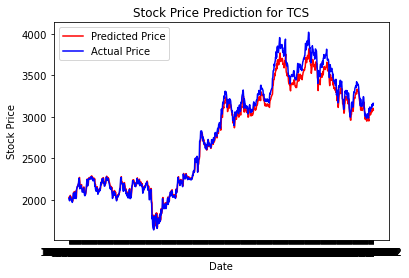

In [3]:
# Make predictions on the test data
predictions = model.predict(test_data[:-1])
predictions = scaler.inverse_transform(predictions)

# Plot the predicted and actual stock prices
plt.plot(df["Date"][train_size+1:], predictions, color="red", label="Predicted Price")
plt.plot(df["Date"][train_size+1:], df["Close"][train_size+1:], color="blue", label="Actual Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction for TCS")
plt.legend()
plt.show()